# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


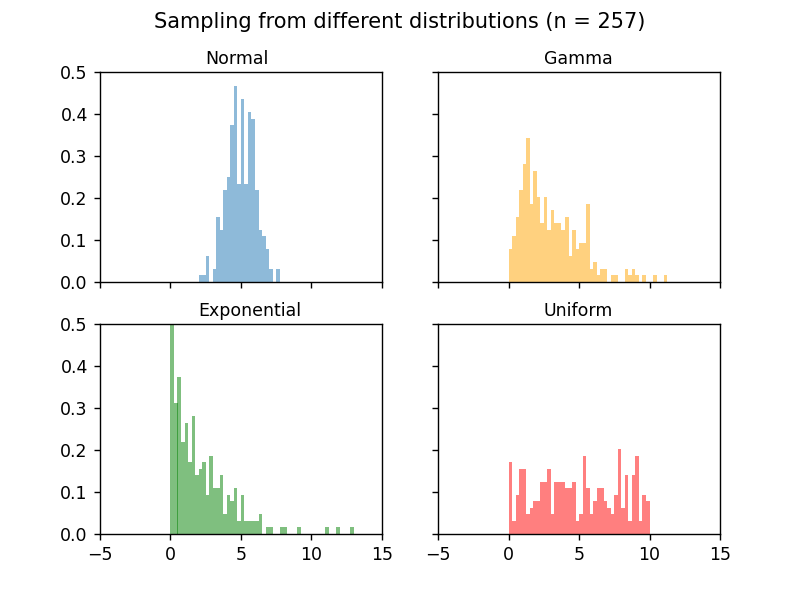

/home/nilson/Projects/Coursera/Applied Data Science/env/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

%matplotlib notebook

n = 300

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x = [np.random.normal(5, 1, 10000), np.random.gamma(2, 1.5, 10000),
     np.random.exponential(2, 10000), np.random.uniform(0,10, 10000)]


# create the function that will do the plotting, where curr is the current frame
def update(curr):
    
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n:
        a.event_source.stop()
    
    for ax in (ax1,ax2,ax3,ax4):
        ax.clear()
    
    # Disabling X axis in frame 1 and 2
    for label in plt.gcf().get_axes()[0].get_xticklabels():
        label.set_visible(False)
    for label in plt.gcf().get_axes()[1].get_xticklabels():
        label.set_visible(False)
    
    # Disabling Y axis in frame 2 and 4
    for label in plt.gcf().get_axes()[1].get_yticklabels():
        label.set_visible(False)
    for label in plt.gcf().get_axes()[3].get_yticklabels():
        label.set_visible(False)
    
    bins = np.arange(-5, 15, 0.25)
    #plt.hist(x[0][:curr], bins=bins)
    ax1.hist(x[0][:curr], density=True, bins=bins, alpha=0.5)
    ax2.hist(x[1][:curr], density=True, bins=bins, alpha=0.5, color='orange')
    ax3.hist(x[2][:curr], density=True, bins=bins, alpha=0.5, color='green')
    ax4.hist(x[3][:curr], density=True, bins=bins, alpha=0.5, color='red')


    fig.suptitle('Sampling from different distributions (n = {})'.format(curr), fontsize=12)
    #plt.gca().set_ylabel('Frequency')
    #plt.gca().set_xlabel('Value')

    ax1.text(2.5, 0.52, 'Normal')
    ax2.text(2.5, 0.52, 'Gamma')
    ax3.text(2,   0.52, 'Exponential')
    ax4.text(2.5, 0.52, 'Uniform')
    plt.axis([-5, 15, 0, 0.5])

    
# create a 3x3 grid of subplots
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

a = animation.FuncAnimation(fig, update, interval=100, frames=n)

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# Uncomment this line to save your video
a.save('samples.mp4', writer=writer)